# Basics of Convolutional Neural Networks
# Project Description
In this notebook I will go over some basics for convoluitinal neural networks. 

In [15]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES']= '0'

In [39]:
PATH = (r'D:\Program Files\data\PetImages')
CAT_PATH = PATH+r'\Cat'
DOG_PATH = PATH+r'\Dog'

In [40]:
cat_photo = CAT_PATH+r'\100.jpg'
img = img = mpimg.imread(cat_photo)

# Ploting and Visualizing the Data

In [36]:
def plot_samples_images(num_images, path_one, path_two):
    """
    Plot a certain ammount of images in the dataset.
    
    Parameters:
    -----------
    num_images : int
        The number of images from each class we want to display
    path_one : str
        The path to the first class
    path_two : str
        The path to the second class in our dataset
    
    Returns:
    --------
    None
    """
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".jpg"):
        

SyntaxError: incomplete input (3193880681.py, line 21)

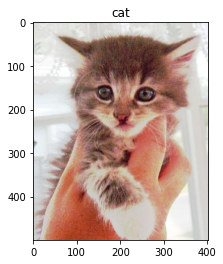

In [41]:
plt.imshow(img)
plt.title('cat')
plt.show()

# Format the Data
- create a dataframe
- split into train test and validate
- format the data

In [37]:
def create_dataframe(path):
    """
    Plot a certain ammount of images in the dataset.
    
    Parameters:
    -----------
    num_images : int
        The number of images from each class we want to display
    path_one : str
        The path to the first class
    path_two : str
        The path to the second class in our dataset
    
    Returns:
    --------
    None
    """
    data = {'cat': [], 'dog': []}
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".jpg"):

# How CNN's Work
- Convolutions
- Max/Min Pooling
- Fully Connected

# Creating the Model

# Analyzing Performence

# What Does the CNN See?